#Objective: Use a Polynomial Linear Regression Model to capture the closing price movemnet of a given stock.

I am using a polynomial regression function to fit/track the adjusted closing price of NVDIA stock

In [79]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [80]:
from IPython import display
display.set_matplotlib_formats('svg') # Improve matplotlib visual quality

<ipython-input-80-dcd5f3b50b37>:2: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



##Import Dataset

In [81]:
stock = 'NVDA'
stock_data = yf.download(stock, period ='10y')
stock_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-07-03,0.462750,0.472500,0.462750,0.471250,0.448601,136892000
2014-07-07,0.472000,0.472250,0.466750,0.467500,0.445031,127496000
2014-07-08,0.466250,0.468250,0.459250,0.463750,0.441461,221940000
2014-07-09,0.467750,0.479750,0.464250,0.477750,0.454788,387668000
2014-07-10,0.468750,0.477250,0.465000,0.475250,0.452408,266308000
...,...,...,...,...,...,...
2024-06-26,126.129997,128.119995,122.599998,126.400002,126.400002,362975900
2024-06-27,124.099998,126.410004,122.919998,123.989998,123.989998,252571700
2024-06-28,124.580002,127.709999,122.750000,123.540001,123.540001,315516700


##Data Preprocessing

In [82]:
# x = stock_data[[i for i in stock_data.columns if i != 'Adj Close' and i != 'Close']].values
x = stock_data[['Close']].values
y = stock_data['Adj Close'].values

In [83]:
x.shape, y.shape

((2516, 1), (2516,))

###Training the Polynomial Regression Model on the whole dataset

In [84]:
pf = PolynomialFeatures(degree = 5)
x_poly = pf.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)

LinearRegression()

In [85]:
lin_reg.coef_.shape

(6,)

###Visualizing the Polynomial Regression results

In [86]:
lin_reg.predict(x_poly).shape

(2516,)

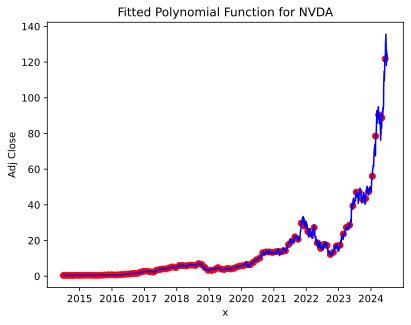

In [87]:
plt.scatter(stock_data.index[::25], y[::25], color = 'r', label = 'True')
plt.plot(stock_data.index, lin_reg.predict(x_poly), color = 'b', label = 'Fitted')
plt.title(f'Fitted Polynomial Function for {stock}')
plt.xlabel('x')
plt.ylabel('Adj Close')
plt.show()